In [19]:
import gymnasium as gym 
from normalized_env import NormalizedActionWrapper
from random_agent import RandomAgent
from heuristic_pendulum_agent import HeuristicPendulumAgent
import numpy as np

In [20]:
env = NormalizedActionWrapper(gym.make("Pendulum-v1", render_mode="human"))
observation, info = env.reset(seed=42)
action = 0
reward_vector = np.zeros(400)
random_agent = RandomAgent(env)
heuristic_agent = HeuristicPendulumAgent(env)
for _ in range(200):
    #print(action,"act")
    
    #Joint torque between [-2,2]
    action =heuristic_agent.compute_action(observation) 

    #action = 1.4*random_agent.compute_action(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    
    
    
    reward_vector[_]=reward
    #print(observation,"obs")
    
    env.render()
    if terminated or truncated:
        observation, info = env.reset()
env.close()



[-0.14995256  0.9886932  -0.12224312]
[-0.16867389  0.98567194  0.37927678]
[-0.23518671  0.97195023  1.3585306 ]
[-0.3464512   0.93806803  2.3274934 ]
[-0.49456784  0.869139    3.2710443 ]
[-0.6634965  0.7481794  4.1628985]
[-0.82696277  0.5622567   4.964033  ]
[-0.9505402   0.31060165  5.6257257 ]
[-0.9999407   0.01089186  6.0986767 ]
[-0.95341045 -0.30167615  6.3468456 ]
[-0.8112675 -0.5846752  6.3605886]
[-0.5957608 -0.8031619  6.162082 ]
[-0.3412318 -0.9399792  5.7997108]
[-0.08140056 -0.99668145  5.3347263 ]
[ 0.15918991 -0.987248    4.827215  ]
[ 0.34497204 -0.93861294  3.846779  ]
[ 0.47709826 -0.87885     2.9028194 ]
[ 0.56260556 -0.8267255   2.0036821 ]
[ 0.608934   -0.79322094  1.1436379 ]
[ 0.6211052  -0.7837272   0.30872223]
[ 0.6005577 -0.7995814 -0.5190732]
[ 0.5648574  -0.8251885  -0.87875926]
[ 0.5118852  -0.85905385 -1.2576507 ]
[ 0.43881625 -0.8985768  -1.661941  ]
[ 0.34241605 -0.93954843 -2.0958736 ]
[ 0.21965462 -0.9755777  -2.560535  ]
[ 0.06879514 -0.99763083 -3

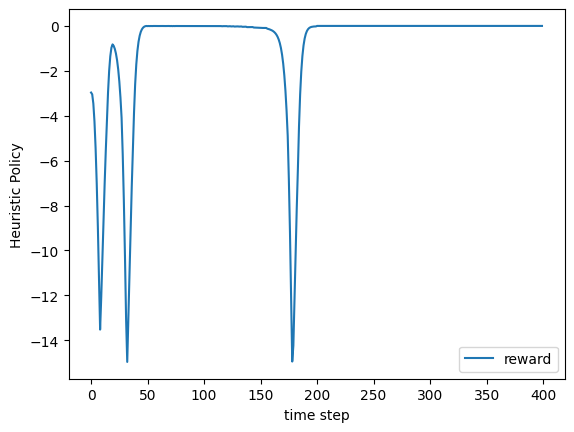

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(reward_vector,label="reward")
plt.xlabel('time step')
plt.ylabel('Heuristic Policy')

plt.legend()
plt.show()